In [1]:
#To intstall gym library
#pip install gym

In [2]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Bernoulli
import torch.nn.functional as F
import numpy as np

In [3]:
env = gym.make('CartPole-v0')

In [4]:
# push left or push right
env.action_space

Discrete(2)

In [5]:
# observation space is a vector of size 4, denoting the current position, angle, and velocities of the cart and pole.
env.observation_space

Box(4,)

In [6]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [7]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [15]:
# CartPole Environment Demo
env.reset()
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        # take a random action
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(observation, reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.04201662 -0.15331321 -0.03617468  0.29284144] 1.0
[ 0.03895036 -0.34790122 -0.03031785  0.57389946] 1.0
[ 0.03199233 -0.54258529 -0.01883987  0.85687927] 1.0
[ 0.02114063 -0.73744555 -0.00170228  1.1435792 ] 1.0
[ 0.00639171 -0.93254521  0.0211693   1.43572781] 1.0
[-0.01225919 -1.1279217   0.04988386  1.73495018] 1.0
[-0.03481762 -1.32357585  0.08458286  2.0427261 ] 1.0
[-0.06128914 -1.51945884  0.12543739  2.36033789] 1.0
[-0.09167832 -1.71545646  0.17264414  2.68880636] 1.0
[-0.12598745 -1.5219677   0.22642027  2.45339344] 1.0
Episode finished after 10 timesteps
[ 0.0219463  -0.17440386  0.00235427  0.31173939] 1.0
[0.01845823 0.02068447 0.00858905 0.01979986] 1.0
[ 0.01887192 -0.1745596   0.00898505  0.31518031] 1.0
[ 0.01538072 -0.36980838  0.01528866  0.61068322] 1.0
[ 0.00798456 -0.56514065  0.02750232  0.90814208] 1.0
[-0.00331826 -0.37040158  0.04566516  0.6242286 ] 1.0
[-0.01072629 -0.56613032  0.05814973  0.93093655] 1.0
[-0.02204889 -0.76198681  0.07676847  1.2413111 ] 

[-0.02024304 -0.21554524  0.14777661  0.71392855] 1.0
[-0.02455394 -0.41237036  0.16205518  1.04923677] 1.0
[-0.03280135 -0.21972571  0.18303992  0.81149186] 1.0
[-0.03719586 -0.02751959  0.19926976  0.58151266] 1.0
[-0.03774625 -0.22479337  0.21090001  0.92976602] 1.0
Episode finished after 27 timesteps
[-0.00169873  0.21924101  0.01360219 -0.27665698] 1.0
[ 0.00268609  0.41416629  0.00806905 -0.56501893] 1.0
[ 0.01096942  0.21893206 -0.00323132 -0.26980485] 1.0
[ 0.01534806  0.02385637 -0.00862742  0.02185715] 1.0
[ 0.01582518 -0.1711408  -0.00819028  0.31180559] 1.0
[ 0.01240237  0.02409687 -0.00195417  0.01655099] 1.0
[ 0.01288431  0.2192468  -0.00162315 -0.27674786] 1.0
[ 0.01726924  0.02414804 -0.0071581   0.01542269] 1.0
[ 0.0177522   0.21937191 -0.00684965 -0.27951008] 1.0
[ 0.02213964  0.4145909  -0.01243985 -0.57434548] 1.0
[ 0.03043146  0.21964554 -0.02392676 -0.28560729] 1.0
[ 0.03482437  0.02487286 -0.02963891 -0.00056568] 1.0
[ 0.03532183 -0.16981177 -0.02965022  0.282620

[ 0.00567612  0.21547932  0.02159558 -0.30254354] 1.0
[ 0.00998571  0.41028694  0.01554471 -0.58833822] 1.0
[ 0.01819144  0.6051878   0.00377794 -0.87608423] 1.0
[ 0.0302952   0.80025819 -0.01374374 -1.16757702] 1.0
[ 0.04630036  0.60531774 -0.03709528 -0.87923449] 1.0
[ 0.05840672  0.80092355 -0.05467997 -1.18334486] 1.0
[ 0.07442519  0.99671067 -0.07834687 -1.49265452] 1.0
[ 0.0943594   0.8026246  -0.10819996 -1.2254289 ] 1.0
[ 0.1104119   0.99896048 -0.13270854 -1.54995923] 1.0
[ 0.1303911   0.80565701 -0.16370772 -1.30145545] 1.0
[ 0.14650424  0.61294636 -0.18973683 -1.06416974] 1.0
[ 0.15876317  0.81000333 -0.21102023 -1.40989911] 1.0
Episode finished after 12 timesteps
[ 0.04101259  0.22362826  0.02936278 -0.32576143] 1.0
[ 0.04548516  0.41832011  0.02284755 -0.6090419 ] 1.0
[ 0.05385156  0.61311534  0.01066671 -0.89444189] 1.0
[ 0.06611387  0.41785037 -0.00722213 -0.59842515] 1.0
[ 0.07447088  0.22283021 -0.01919063 -0.30802583] 1.0
[ 0.07892748  0.02798689 -0.02535115 -0.021456

In [9]:
class Agent(nn.Module):
    def __init__(self, input_dim):
        super(Agent, self).__init__()
        self.linear = nn.Linear(input_dim, 2)
        self.Softmax= nn.Softmax()

    def forward(self, input):
        out = F.softmax(self.linear(input),dim=-1)
        return out

In [10]:
## hyperparameters
episodes = 500
learning_rate = 0.001
gamma = 0.99


In [11]:
def discount_rewards(r):
    # compute discounted rewards using episode rewards (Q-value estimation)
    r = np.asarray(r)
    discounted_r = np.zeros_like(r)
    running_add = 0
    for t in reversed(range(0, r.size)):
        running_add = running_add * gamma + r[t]
        discounted_r[t] = running_add
    return discounted_r

In [12]:
agent = Agent(4)
optimizer = optim.SGD(agent.parameters(), lr=learning_rate)

In [13]:
def finish_ep(ep_logps, ep_rewards):
    R = discount_rewards(ep_rewards)
    # accumulate gradients for every action-state-transition in the trajectory
    for log_prob, r in zip(ep_logps, R):
        (-log_prob * r).backward()
    optimizer.step()
    optimizer.zero_grad()

In [16]:
## RUN POLICY GRADIENT ALGORITHM
total_reward = []
collector = []
for i in range(episodes):
    done = False
    reward = 0
    t = 0
    # Initial observation
    observation = torch.FloatTensor(env.reset()).resize(1,4)
    decay = 1
    running_reward = 0
    ep_actions = []
    ep_log_probs = []
    ep_rewards = []
    while not done:
        t += 1
        # obtaining an stochastic action from the agent (Bernoulli sample of pushing left/right)
        bernoulli_obj = Bernoulli((agent(observation)[0][0]).clamp(0,1))
        action = bernoulli_obj.sample()
        # track log-likelihood of the sampled action
        ep_log_probs.append(bernoulli_obj.log_prob(action))
        # get next state from the environment by taking the action
        observation, reward, done, info = env.step(int(action.data.item()))
        observation = torch.FloatTensor(observation).resize(1, 4)
        # track reward from taking the action
        ep_rewards.append(reward)
        running_reward += reward
    finish_ep(ep_log_probs, ep_rewards)
    total_reward.append(running_reward)
        
    if i%50 == 0:
        print("average of 50 latest episode rewards:", sum(total_reward[-50:]) / 50)
        
    if i%10 == 0:
        collector.append(sum(total_reward[-50:]) / 50)


average of 50 latest episode rewards: 1.78
average of 50 latest episode rewards: 153.7
average of 50 latest episode rewards: 164.8
average of 50 latest episode rewards: 141.4
average of 50 latest episode rewards: 123.4
average of 50 latest episode rewards: 199.96
average of 50 latest episode rewards: 184.08
average of 50 latest episode rewards: 165.08
average of 50 latest episode rewards: 162.72
average of 50 latest episode rewards: 158.04


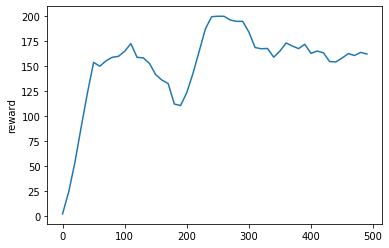

In [18]:
import matplotlib.pyplot as plt

# Plot the reward
plt.plot([x*10 for x in range(len(collector))], collector)
plt.ylabel('reward')

plt.show()


In [19]:
for _ in range(100):
    done = False
    observation = torch.FloatTensor(env.reset()).resize(1,4)
    while not done:
        env.render()
        # take a deterministic action by taking the higher likelihood action directly
        action_prob = agent(observation)[0][0]
        p_action = action_prob > 0.5
        # get the next step
        observation, reward, done, info = env.step(int(p_action.data.item()))
        observation = torch.FloatTensor(observation).resize(1, 4)


C:\Users\tian-\AppData\Local\conda\conda\envs\py36\lib\site-packages\torch\tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
https://www.youtube.com/watch?v=bsUY9wplVYw

In [ ]:
https://www.youtube.com/watch?v=gn4nRCC9TwQ&t=41s